# Name:- Sujeet Kumar


# Email i'd :- Sujetkr2508@gmail.com

In [52]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Importing necessary libraries..

In [97]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
import warnings
warnings.filterwarnings('ignore');

# UPLOADING THE CSV FILE

In [55]:
df = pd.read_csv("/content/adult (1).csv")


# DATA ANALYSIS

In [56]:
# Columns name we can find from data description 
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status','occupation','relationship', 
              'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

df.columns = col_labels

In [57]:
#PREVIEW DATASET
df.head(10)
 

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [58]:
# Shape of Dataset
print('Rows: {} Columns: {}'.format(df.shape[0], df.shape[1]))

Rows: 32560 Columns: 15


In [59]:
# Making sure that the data does not contain unecessary spaces.
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [60]:
# Before any analysis, let's convert the target column into numerical classes.
df['income'] = df['income'].replace({'<=50K':0,'>50K':1})

# DATA PREPROCESSING

EXPLORING THE DESCRIPTIVE STATISTIC OF THE VARIABLES

In [61]:
df.describe(include='all')

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
count,32560.000000,32560,3.256000e+04,32560,32560.000000,32560,32560,32560,32560,32560,32560.000000,32560.000000,32560.000000,32560,32560.000000
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,NaN
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,NaN
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27815,21789,NaN,NaN,NaN,29169,NaN
mean,38.581634,NaN,1.897818e+05,NaN,10.080590,NaN,NaN,NaN,NaN,NaN,1077.615172,87.306511,40.437469,NaN,0.240817
std,13.640642,NaN,1.055498e+05,NaN,2.572709,NaN,NaN,NaN,NaN,NaN,7385.402999,402.966116,12.347618,NaN,0.427586
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,0.000000
25%,28.000000,NaN,1.178315e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,0.000000
50%,37.000000,NaN,1.783630e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,0.000000
75%,48.000000,NaN,2.370545e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,0.000000


In [62]:
# Information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education_num   32560 non-null  int64 
 5   marital_status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital_gain    32560 non-null  int64 
 11  capital_loss    32560 non-null  int64 
 12  hours_per_week  32560 non-null  int64 
 13  native_country  32560 non-null  object
 14  income          32560 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


CHECKING FOR ANY MISSING VALUES FOR DATA SET

In [63]:
# Checking nan values
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [64]:
# checking '?' in our dataset
df.isin(['?']).sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

We can see that there is no missing value present in dataset, but instead missing values are present in the form of "?"..
So i am replacing this to np.nan..

In [65]:
# We are replacing '?' with np.nan
df = df.replace(to_replace='?', value=np.nan)

# Now again checking missing values
print("\n ----Missing values---\n")
print(df.isna().sum())

# Missing values in percentage
print("\n ----Missing values in percentage---\n")
print(round((df.isna().sum()/df.shape[0])*100,2))
print("\n---Total {}% of missing values present in our dataset".
      format(round(sum(df.isna().sum()/df.shape[0])*100,2)))


 ----Missing values---

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

 ----Missing values in percentage---

age               0.00
workclass         5.64
fnlwgt            0.00
education         0.00
education_num     0.00
marital_status    0.00
occupation        5.66
relationship      0.00
race              0.00
sex               0.00
capital_gain      0.00
capital_loss      0.00
hours_per_week    0.00
native_country    1.79
income            0.00
dtype: float64

---Total 13.09% of missing values present in our dataset


# HANDLING THE MISSING VALUES..

In [66]:
# As the columns which have missing values, they are only categorical, we'll use the categorical imputer
from sklearn_pandas import CategoricalImputer
imputer = CategoricalImputer()

In [67]:
# Imputing the missing values
df['workclass'] = imputer.fit_transform(df['workclass'])
df['occupation'] = imputer.fit_transform(df['occupation'])
df['native_country'] = imputer.fit_transform(df['native_country'])

In [68]:
# Again checking missing values after imputation
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

# DATA EXPLORATION

DATA VISUALIZATION

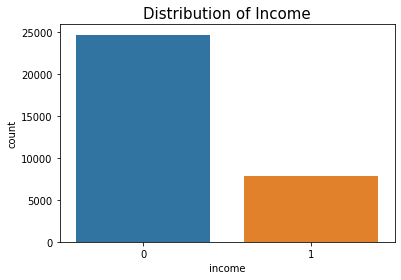

In [69]:
# Checking label counts
sns.countplot(x='income', data=df)
plt.title("Distribution of Income", fontsize = 15)
plt.show()

In [70]:
print('-> Total No. of records : {}\n'.format(len(df)))

print('-> Number of people making more that >50K : {}%\n'.format(
    round((len(df[df['income']==1])/32561)*100, 2)))

print('-> Number of people making less than or equal to <=50K : {}%'.format(
    round((len(df[df['income']==0])/32561)*100, 2)))

-> Total No. of records : 32560

-> Number of people making more that >50K : 24.08%

-> Number of people making less than or equal to <=50K : 75.92%


# Age

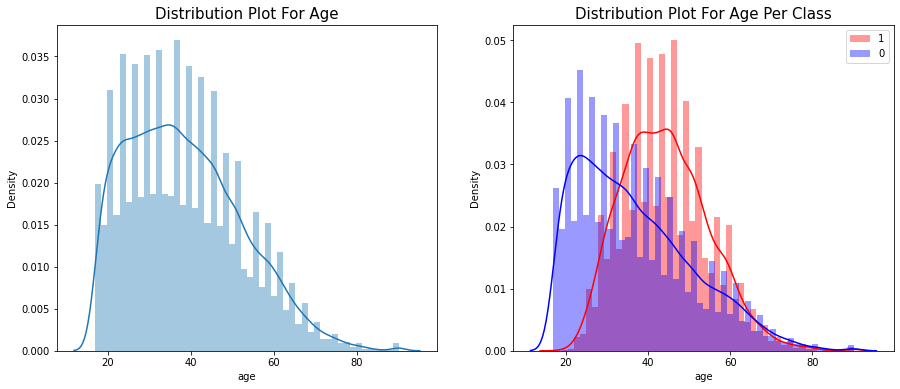

In [71]:
# Distribution plot for age column
plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
sns.distplot(df['age'])
plt.title('Distribution Plot For Age', fontsize = 15)

# Distribution plot for age per class
plt.subplot(1,2,2)
sns.distplot(df[df['income']==1]['age'], label='1', color='red')
sns.distplot(df[df['income']==0]['age'], label='0', color='blue')
plt.legend()
plt.title('Distribution Plot For Age Per Class', fontsize = 15)
plt.show()

.On taking a look at the result of distribution plot for age column, I can see that the most no of people are young.
.And The distributions for age per class have some overlap on the far right-hand side.
.By looking distribution plot for age per class graph we can say that there are relatively less young people who have an annual income is more than 50K

# WORKCLASS

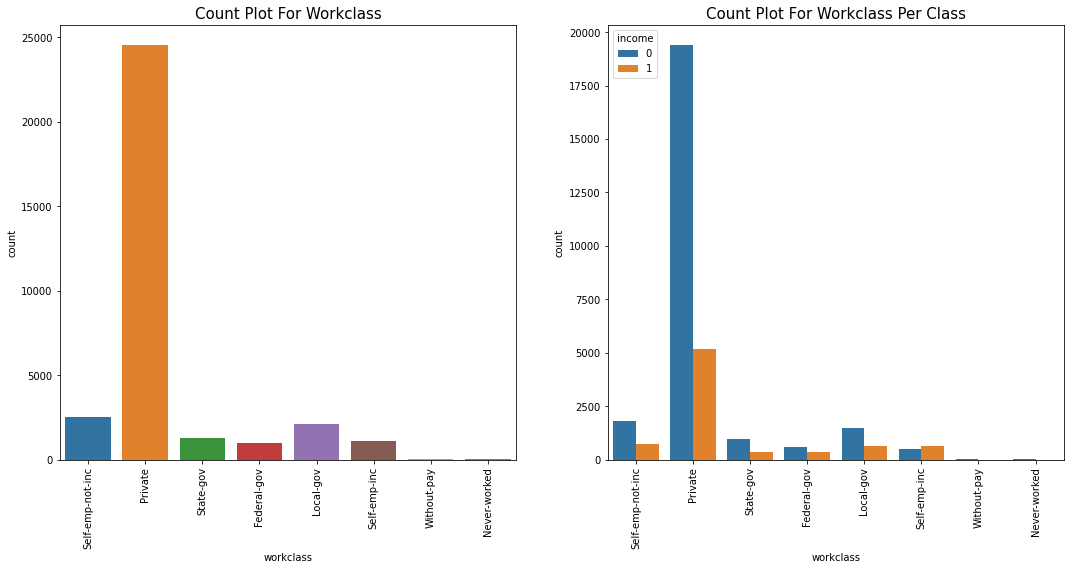

In [72]:
# Countplot for workclass column
plt.figure(figsize=[18,8])
plt.subplot(1,2,1)
sns.countplot(df['workclass'])
plt.title("Count Plot For Workclass", fontsize = 15)
plt.xticks(rotation=90)

# Countplot for workclass per class
plt.subplot(1,2,2)
sns.countplot(data=df, x='workclass', hue='income')
plt.title("Count Plot For Workclass Per Class", fontsize = 15)
plt.xticks(rotation=90)
plt.show()

*In this dataset most number of people are working in private sector.*

*Taking look at the second plot above, I can see that who have an annual income is more than 50K or less than 50K are work in private.*

# EDUCATION AND EDUCATION NUMBER

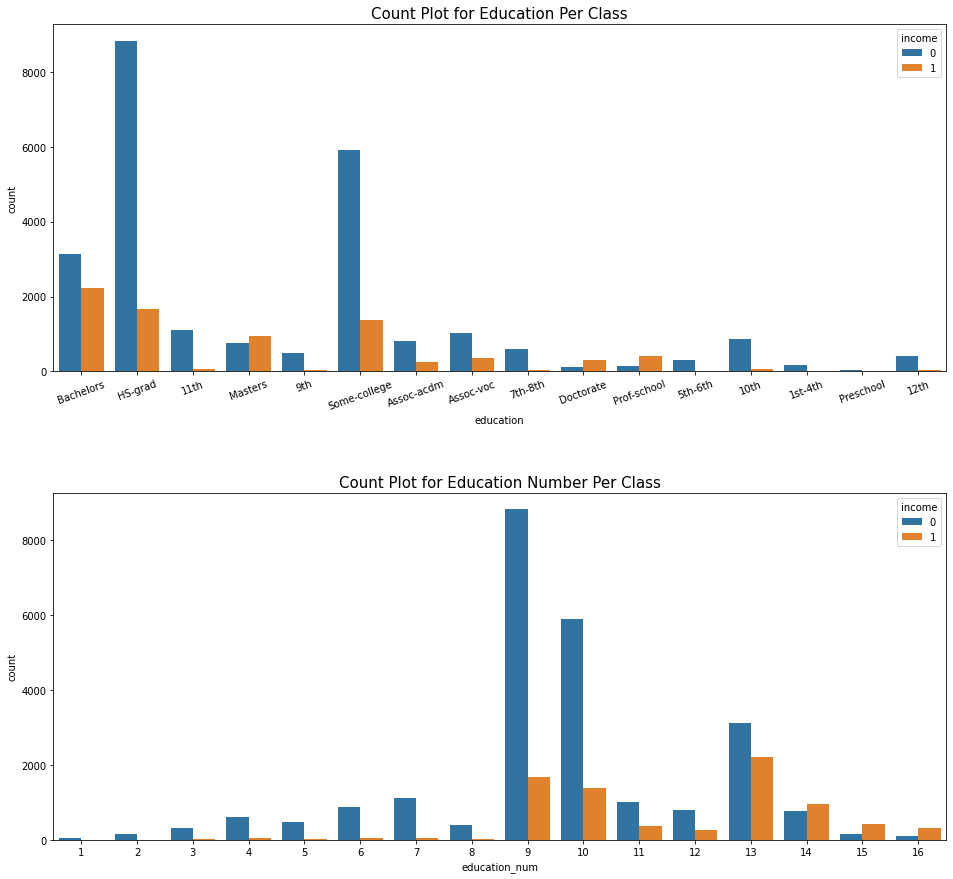

In [73]:
# Count Plot for Education Per Class
plt.figure(figsize=[16,15])
plt.subplot(2,1,1)
sns.countplot(x='education', data=df, hue='income')
plt.xticks(rotation=20)
plt.title("Count Plot for Education Per Class", fontsize = 15)

# Count Plot for Education Number Per Class
plt.subplot(2,1,2)
sns.countplot(x='education_num', data=df, hue='income')
plt.title("Count Plot for Education Number Per Class", fontsize = 15)
plt.subplots_adjust(hspace = 0.35)

In [74]:
education_classes = df['education'].unique()
for educ_class in education_classes:
    print("{}, the Education Number is {}".
          format(educ_class, df[df['education'] == educ_class]['education_num'].unique()))

Bachelors, the Education Number is [13]
HS-grad, the Education Number is [9]
11th, the Education Number is [7]
Masters, the Education Number is [14]
9th, the Education Number is [5]
Some-college, the Education Number is [10]
Assoc-acdm, the Education Number is [12]
Assoc-voc, the Education Number is [11]
7th-8th, the Education Number is [4]
Doctorate, the Education Number is [16]
Prof-school, the Education Number is [15]
5th-6th, the Education Number is [3]
10th, the Education Number is [6]
1st-4th, the Education Number is [2]
Preschool, the Education Number is [1]
12th, the Education Number is [8]


In [75]:
# education & education number column are just the same, so I am dropping education number column.
df.drop(labels='education_num', axis=1, inplace=True)

# Gender

Text(0.5, 1.0, 'Countplot for Gender Per Class')

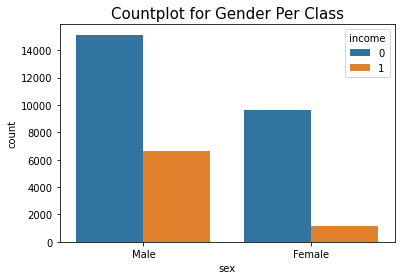

In [76]:
# Count Plot For Gender Per Class
sns.countplot(x='sex' ,data=df, hue='income')
plt.title("Countplot for Gender Per Class", fontsize = 15)

# Maritaial Status

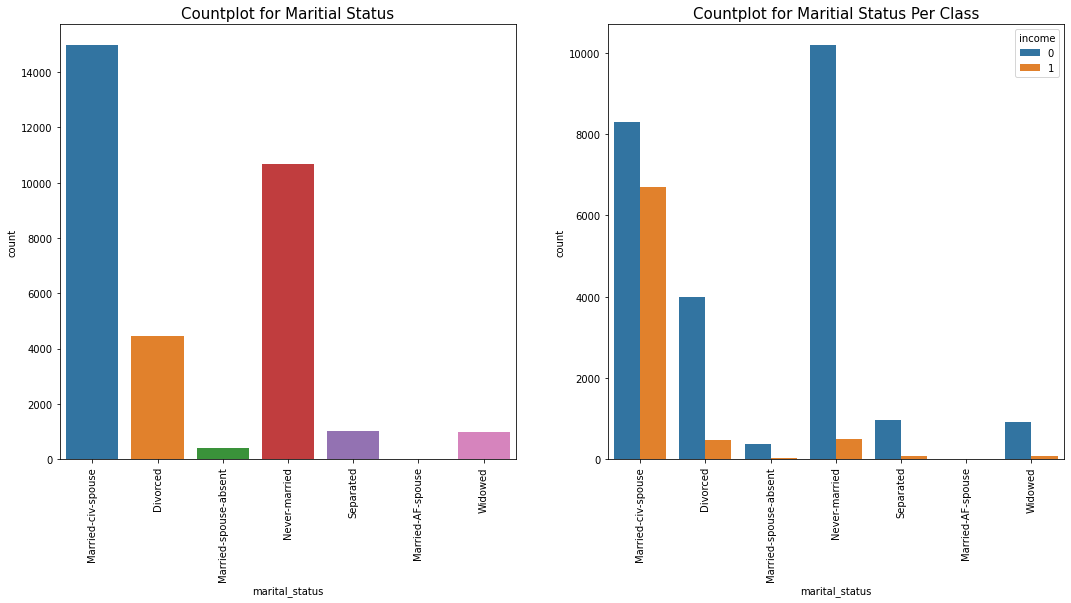


 --Value Counts-- 

Married-civ-spouse       14976
Never-married            10682
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital_status, dtype: int64


In [77]:
# Countplot for Maritial Status
plt.figure(figsize=[18,8])
plt.subplot(1,2,1)
sns.countplot(df['marital_status'])
plt.title("Countplot for Maritial Status", fontsize = 15)
plt.xticks(rotation=90)

# Countplot for Maritial Status Per Class
plt.subplot(1,2,2)
sns.countplot(df['marital_status'],hue=df['income'])
plt.title("Countplot for Maritial Status Per Class", fontsize = 15)
plt.xticks(rotation=90)
plt.show()

print('\n --Value Counts-- \n')
print(df['marital_status'].value_counts())

*Most of the people whose annual income is more than 50K, their marital status is married.*

In [78]:
# Transforming Maritial Status column with value as either married or not married.
df = df.replace({'Married-civ-spouse':'married','Married-AF-spouse':'married','Married-spouse-absent':'married',
                    'Never-married':'not married','Divorced':'not married','Separated':'not married','Widowed':'not married'})

# Relationship

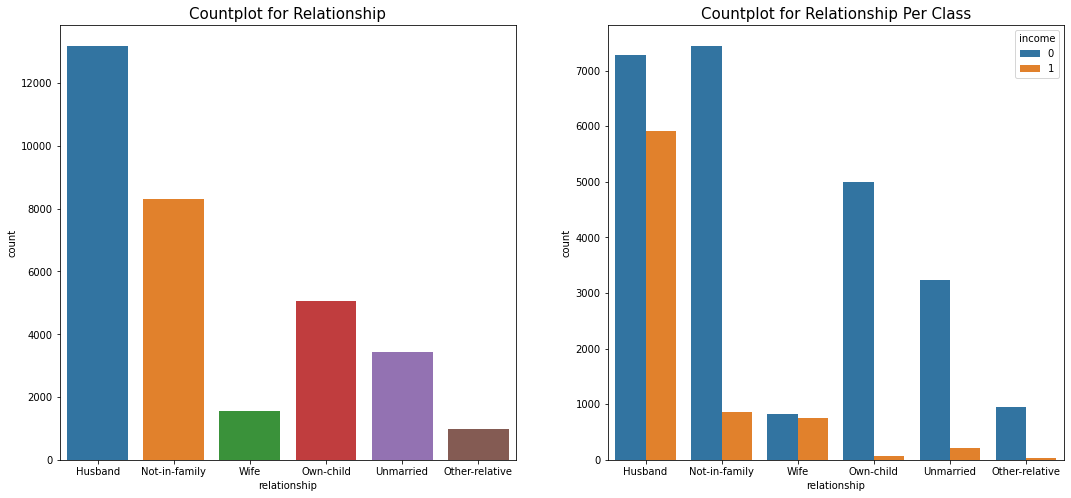


 --Value Counts-- 

Husband           13193
Not-in-family      8304
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64


In [79]:
plt.figure(figsize=[18,8])
plt.subplot(1,2,1)
sns.countplot(df['relationship'])
plt.title('Countplot for Relationship', fontsize = 15)


plt.subplot(1,2,2)
sns.countplot(df['relationship'],hue=df['income'])
plt.title('Countplot for Relationship Per Class', fontsize = 15)
plt.show()

print('\n --Value Counts-- \n')
print(df['relationship'].value_counts())


# Race 

Text(0.5, 1.0, 'Countplot for Race Per Class')

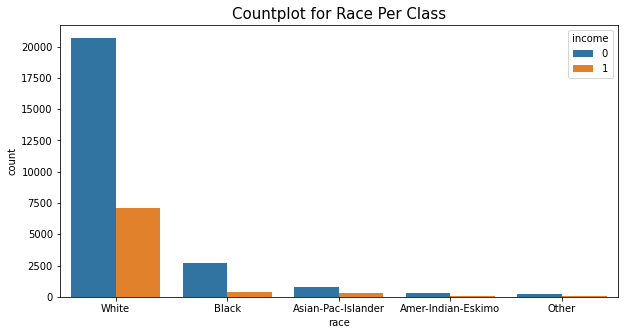

In [80]:
plt.figure(figsize=[10,5])
sns.countplot(df['race'], hue=df['income'])
plt.title('Countplot for Race Per Class', fontsize = 15)

# Country

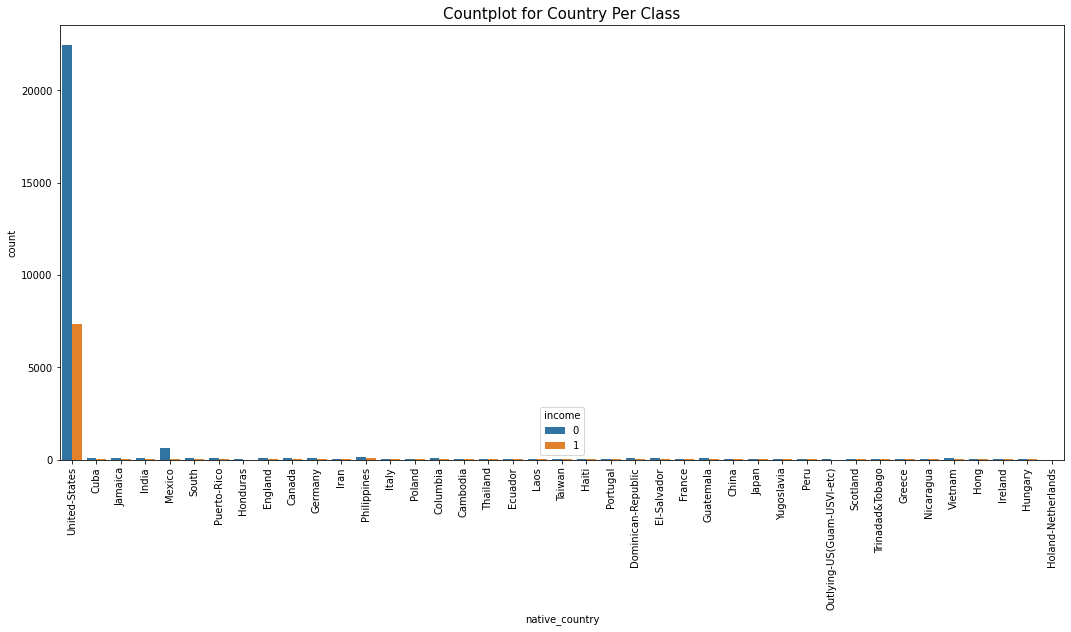


 --Value Counts-- 

United-States                 29752
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece 

In [81]:
plt.figure(figsize=[18,8])
sns.countplot(df['native_country'],hue=df['income'])
plt.title('Countplot for Country Per Class', fontsize = 15)
plt.xticks(rotation=90)
plt.show()

print('\n --Value Counts-- \n')
print(df['native_country'].value_counts())

print('\n-----------------------------------')
print('{}% people belong from united states.'
      .format(round(len(df[df['native_country']=='United-States'])/32561*100,2)))

print('{}% people belong from other country.'
      .format(round(len(df[df['native_country']!='United-States'])/32561*100,2)))

In [82]:
# Transforming native country column with value as either United States or Other.
countries = df['native_country'].unique()[1:]
df['native_country'] = df['native_country'].replace(to_replace=countries, value='Other')

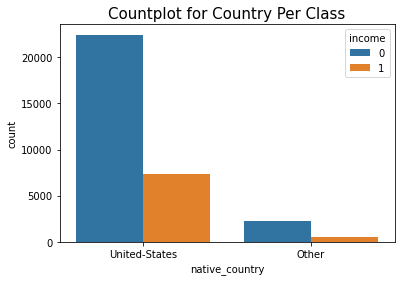

In [83]:
# Countplot for Country Per Class
sns.countplot(df['native_country'], hue=df['income'])
plt.title('Countplot for Country Per Class', fontsize = 15)
plt.show()

# Occupation..

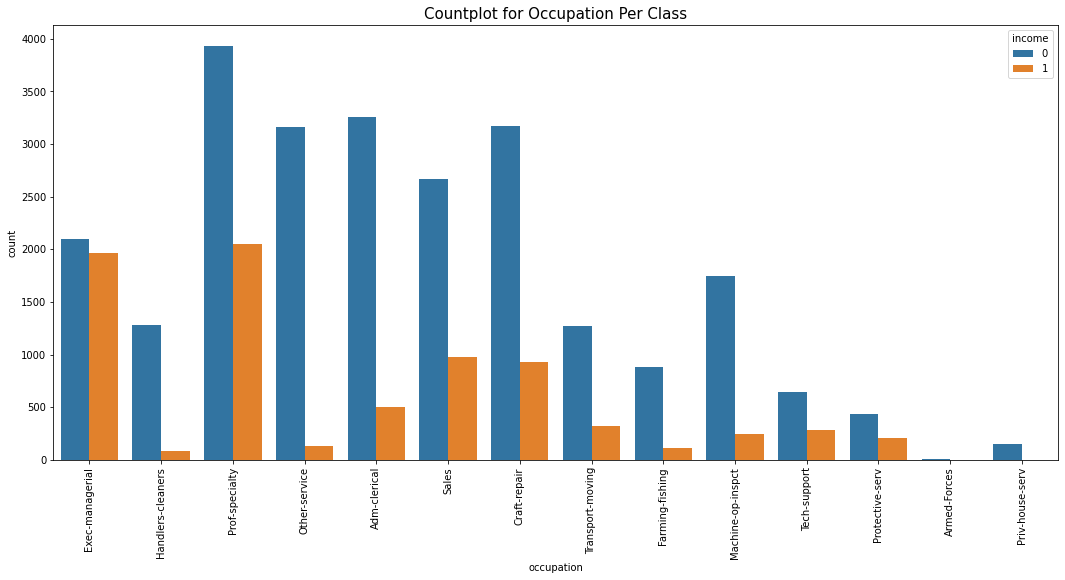

In [84]:
plt.figure(figsize=[18,8])
sns.countplot(df['occupation'], hue=df['income'])
plt.title('Countplot for Occupation Per Class', fontsize = 15)
plt.xticks(rotation=90)
plt.show()

# Hours Per week 

Text(0.5, 1.0, 'Distribution plot for hours per week')

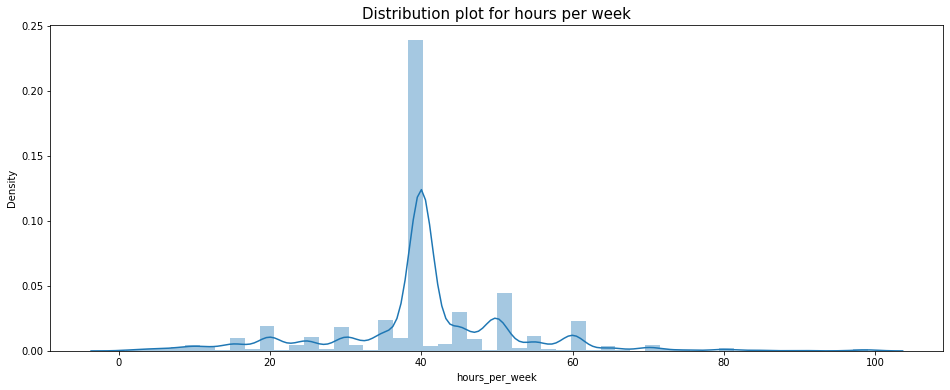

In [85]:
# Distribution plot for hours per week column
plt.figure(figsize=[16,6])
sns.distplot(df['hours_per_week'])
plt.title('Distribution plot for hours per week', fontsize = 15)

*By looking distribution plot for hours per weak column our data is aligned around the centre.*

*In this dataset most of the people work 30 to 40 hours per week*

# DEALING WITH CATEGORICAL VARIABLES 

In [86]:
# Categorical features
cat_df = df.select_dtypes(include=['object'])
num_df = df.select_dtypes(include=['int64'])

# Categorical column with their unique value
for i in cat_df.columns:
    print("{} : {} \n".format(i, cat_df[i].unique()))

workclass : ['Self-emp-not-inc' 'Private' 'State-gov' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked'] 

education : ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th'] 

marital_status : ['married' 'not married'] 

occupation : ['Exec-managerial' 'Handlers-cleaners' 'Prof-specialty' 'Other-service'
 'Adm-clerical' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' 'Protective-serv'
 'Armed-Forces' 'Priv-house-serv'] 

relationship : ['Husband' 'Not-in-family' 'Wife' 'Own-child' 'Unmarried' 'Other-relative'] 

race : ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other'] 

sex : ['Male' 'Female'] 

native_country : ['United-States' 'Other'] 



In [87]:
# Creating dummies variables
train_data_dummie = pd.get_dummies(df,drop_first=True)
train_data_dummie.head()

,age,fnlwgt,capital_gain,capital_loss,hours_per_week,income,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,native_country_United-States
0,50,83311,0,0,13,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
1,38,215646,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,1
2,53,234721,0,0,40,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,1
3,28,338409,0,0,40,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
4,37,284582,0,0,40,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,1


In [88]:
print("Total No. of features after creating dummie variable : {}\n".format(len(train_data_dummie.columns)))
print('--Features--\n')
for i in train_data_dummie.columns:
    print(i)
print('---------------------------')

Total No. of features after creating dummie variable : 53

--Features--

age
fnlwgt
capital_gain
capital_loss
hours_per_week
income
workclass_Local-gov
workclass_Never-worked
workclass_Private
workclass_Self-emp-inc
workclass_Self-emp-not-inc
workclass_State-gov
workclass_Without-pay
education_11th
education_12th
education_1st-4th
education_5th-6th
education_7th-8th
education_9th
education_Assoc-acdm
education_Assoc-voc
education_Bachelors
education_Doctorate
education_HS-grad
education_Masters
education_Preschool
education_Prof-school
education_Some-college
marital_status_not married
occupation_Armed-Forces
occupation_Craft-repair
occupation_Exec-managerial
occupation_Farming-fishing
occupation_Handlers-cleaners
occupation_Machine-op-inspct
occupation_Other-service
occupation_Priv-house-serv
occupation_Prof-specialty
occupation_Protective-serv
occupation_Sales
occupation_Tech-support
occupation_Transport-moving
relationship_Not-in-family
relationship_Other-relative
relationship_Own-ch

# FEATURE SELECTION

In [89]:
from sklearn.preprocessing import LabelEncoder
temp_data = df.copy()
for col in temp_data.columns:
    if temp_data[col].dtypes == 'object':
        encoder = LabelEncoder()
        temp_data[col] = encoder.fit_transform(temp_data[col])
        
# Correated Features with target variable
print('\n--Correated Features with target variable--\n')
print(abs(temp_data.corrwith(temp_data['income'])).sort_values(ascending=False)[1:])


--Correated Features with target variable--

marital_status    0.434935
relationship      0.250924
age               0.234039
hours_per_week    0.229690
capital_gain      0.223333
sex               0.215995
capital_loss      0.150523
education         0.079311
race              0.071853
native_country    0.038948
occupation        0.034599
fnlwgt            0.009481
workclass         0.002739
dtype: float64


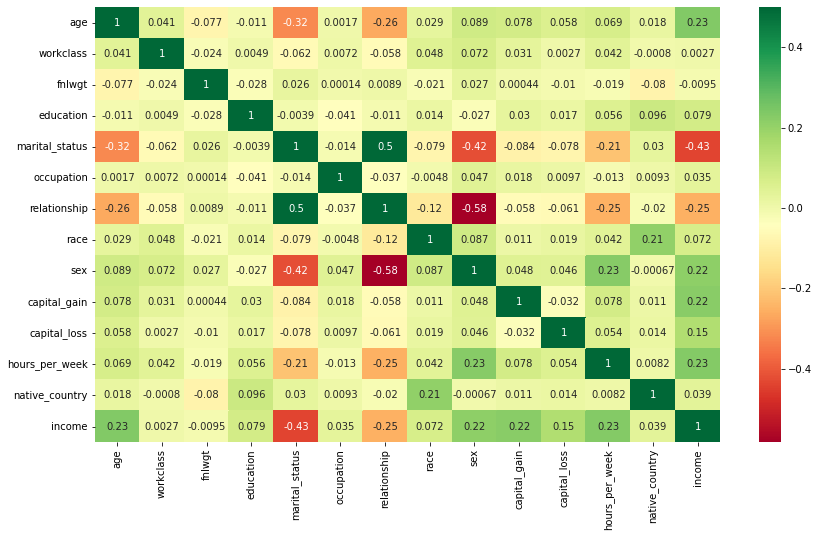

In [90]:
# Correlation Heatmap
plt.figure(figsize=[14,8])
sns.heatmap(temp_data.corr(), annot=True, cmap='RdYlGn', vmax=.5)
plt.show()

In [91]:
# Droping those features which we are not going to use
final_features = train_data_dummie.drop(['fnlwgt','workclass_Local-gov', 'workclass_Never-worked','workclass_Private',
                                         'workclass_Self-emp-inc','workclass_Self-emp-not-inc', 'workclass_State-gov',
                                         'workclass_Without-pay'], axis=1)

# MODEL DEVELOPMENT


**DECLARING DEPENDENT AND INDEPENDENT VARIABLES**

In [92]:
X = final_features.drop(['income'],axis=1)
y = final_features['income']

FEATURE SCALING 

In [93]:
# Feature scaling on training data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X[['age', 'capital_gain', 'capital_loss', 'hours_per_week']])

StandardScaler()

In [94]:
input_scaled = scaler.transform(X[['age', 'capital_gain', 'capital_loss', 'hours_per_week']])
scaled_data = pd.DataFrame(input_scaled,columns=['age', 'capital_gain', 'capital_loss', 'hours_per_week'])

In [95]:
X_scaled = scaled_data.join(X.drop(['age','capital_gain', 'capital_loss','hours_per_week'],axis=1))


Fixing Imbalanced dataset

In [104]:
# Fixing imbalanced dataset by oversampling
rd_over_sample = RandomOverSampler()
X_sampled, y_sampled = rd_over_sample.fit_resample(X_scaled,y)

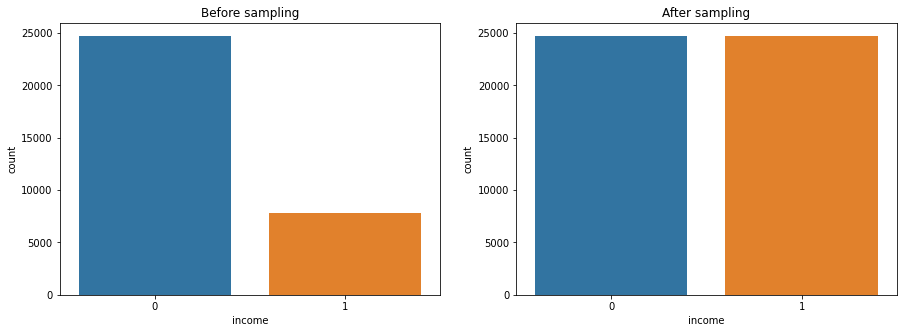

Before sampling : 
0    24719
1     7841
Name: income, dtype: int64

After sampling : 
0    24719
1    24719
Name: income, dtype: int64


In [105]:
# Plot Before sampling
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
sns.countplot(train_data_dummie['income'])
plt.title("Before sampling")

# Plot After sampling
plt.subplot(1,2,2)
sns.countplot(y_sampled.squeeze())
plt.title("After sampling")
plt.show()

print('Before sampling : \n{}'.format(y.value_counts()))
print('\nAfter sampling : \n{}'.format(y_sampled.value_counts()))

# TRAINING AND TESTING DATA

In [106]:
# Split data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=0)

# A) GAUSSIAN NAIVE BAYES CLASSIFIER

In [120]:
#Model Building
from sklearn.naive_bayes import GaussianNB  
Gnb = GaussianNB()  
#Training Model
Gnb.fit(x_train, y_train)  
#Model summary
y_pred_Gnb = Gnb.predict(x_test)
y_pred_train_Gnb = Gnb.predict(x_train)



In [121]:
print("-----Test Data Accuracy----")
print('Random Forest Classifier:')
print('Accuracy score:', round(accuracy_score(y_test, y_pred_dt), 4))
print('F1 score:', round(f1_score(y_test, y_pred_Gnb), 4))

print("\n-----Train Data Accuracy----")
print('Accuracy score:', round(accuracy_score(y_train, y_pred_train_Gnb), 4))
print('F1 score:', round(f1_score(y_train, y_pred_train_Gnb), 4))

-----Test Data Accuracy----
Random Forest Classifier:
Accuracy score: 0.8203
F1 score: 0.7735

-----Train Data Accuracy----
Accuracy score: 0.7352
F1 score: 0.778


#B) DECISION TREE CLASSIFIER

In [109]:
# Model Building
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=10,random_state=0)

# Training Model
dt.fit(x_train,y_train)
 
# Model Summary
y_pred_dt = dt.predict(x_test)
y_pred_train_dt = dt.predict(x_train)

In [110]:
print("-----Test Data Accuracy----")
print('Decision Tree Classifier:')
print('Accuracy score:', round(accuracy_score(y_test, y_pred_dt), 4))
print('F1 score:', round(f1_score(y_test, y_pred_dt), 4))

print("\n-----Train Data Accuracy----")
print('Accuracy score:', round(accuracy_score(y_train, y_pred_train_dt), 4))
print('F1 score:', round(f1_score(y_train, y_pred_train_dt), 4))

-----Test Data Accuracy----
Decision Tree Classifier:
Accuracy score: 0.8203
F1 score: 0.8298

-----Train Data Accuracy----
Accuracy score: 0.826
F1 score: 0.8369


# C) RANDOM FOREST CLASSIFIER

In [111]:
# Model Building
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0, max_depth=30)

# Training Model
rfc.fit(x_train,y_train)

# Model summary
y_pred_rfc = rfc.predict(x_test)
y_pred_train_rfc = rfc.predict(x_train)

In [112]:
print("-----Test Data Accuracy----")
print('Random Forest Classifier:')
print('Accuracy score:', round(accuracy_score(y_test, y_pred_dt), 4))
print('F1 score:', round(f1_score(y_test, y_pred_rfc), 4))

print("\n-----Train Data Accuracy----")
print('Accuracy score:', round(accuracy_score(y_train, y_pred_train_rfc), 4))
print('F1 score:', round(f1_score(y_train, y_pred_train_rfc), 4))

-----Test Data Accuracy----
Random Forest Classifier:
Accuracy score: 0.8203
F1 score: 0.9056

-----Train Data Accuracy----
Accuracy score: 0.951
F1 score: 0.9528


# D) LOGISTIC REGRESSION MODEL 

In [107]:
# Model Building
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)

# Training Model
lr.fit(x_train,y_train)

# Model Summary
y_pred_lr = lr.predict(x_test)
y_pred_train_lr = lr.predict(x_train)

In [108]:
print("-----Test Data Accuracy----")
print('Logistic Regression:')
print('Accuracy score:', round(accuracy_score(y_test, y_pred_lr), 4))
print('F1 score:', round(f1_score(y_test, y_pred_lr), 4))

print("\n-----Train Data Accuracy----")
print('Accuracy score:', round(accuracy_score(y_train, y_pred_train_lr), 4))
print('F1 score:', round(f1_score(y_train, y_pred_train_lr), 4))

-----Test Data Accuracy----
Logistic Regression:
Accuracy score: 0.8203
F1 score: 0.8235

-----Train Data Accuracy----
Accuracy score: 0.8207
F1 score: 0.8256


# E) KNN CLASSIFIER

In [122]:
#Model Building
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40)


In [123]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [124]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 8)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [125]:
y_pred = classifier.predict(X_test)

In [126]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[9241  649]
 [1559 1575]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      9890
           1       0.71      0.50      0.59      3134

    accuracy                           0.83     13024
   macro avg       0.78      0.72      0.74     13024
weighted avg       0.82      0.83      0.82     13024

Accuracy: 0.8304668304668305


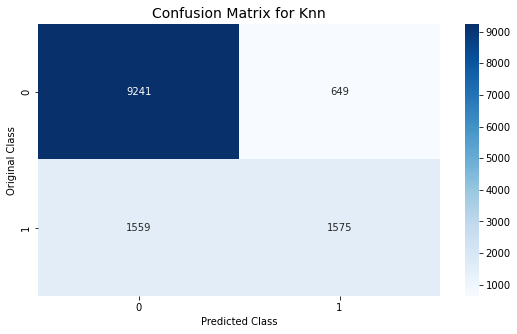

In [130]:
# Plot confusion matrix of knn classifier
plt.figure(figsize=[9,5])
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Knn', fontsize = 14)
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()